# LINEAR REGRESSION MODELS PART 1

## CONTENTS

__1.INTRODUCTION__

__2.LIBRARIES AND DATA__
       
__2.SCATTERPLOTS__

__3.BOXPLOTS__
             
__4.CORRELATION MATRIX__

__5. PCA (DIMENSIONS' REDUCTION)__

__6. TRAIN-TEST SPLIT__


## 1. INTRODUCTION

In this Jupyter Notebook, we'll employ Linear Regression to construct two models.

Firstly, we'll reduce dimensionality using Principal Component Analysis (PCA) with 20 components.

For the first model, we'll utilize X, defined as (X1, X2, ..., X20). In the second model, we'll augment the features with their squared elements (X^2).

To assess model performance, we'll compute the metrics R-squared, training Mean Squared Error (MSE), training MSE derived from k-fold cross-validation, and Test MSE using the test dataset.

## 2. LIBRARIES AND DATA

__Libraries__

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import random as rndm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

__Importing data__

In [2]:
data1 = pd.read_csv("train_dataset.csv") 
data2 = pd.read_csv("test_dataset.csv") 

# Train and test Dataset
train_df = data1.copy()
test_df = data2.copy()

In [3]:
train_df.head(2)

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Geography_EAST,Geography_WEST
0,68.0,36,205.5,392.5,37691,12472,18.2,0.0,38888.25,41.7,...,42.0,22.6,73.765723,20.691824,0.00000,2.625786,45.915064,2.657444,0,0
1,463.0,201,178.9,437.3,54359,88502,9.9,0.0,52796.00,42.0,...,30.3,13.9,93.823619,2.096062,0.60307,0.927191,53.538203,4.497369,0,0


In [4]:
test_df.head(2)

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Geography_EAST,Geography_WEST
0,528.0,212,185.1,461.8,38224,121802,21.5,771.744306,38888.25,33.3,...,31.7,20.8,78.494017,9.453871,4.717536,2.812377,42.218984,7.014171,0,0
1,104.0,42,179.9,460.0,54916,15858,9.6,315.298272,58020.05,44.3,...,33.2,14.2,97.423480,0.471845,0.316633,0.769852,58.589375,4.061069,0,0


## 3. PREPROCESSING

In [5]:
# Defining kfold validation
cv = KFold(n_splits=5) 

In [6]:
# Defining X_train, Y_train, X_test, Y_test
X_train = train_df.drop(columns = 'TARGET_deathRate')
Y_train = train_df[ 'TARGET_deathRate']

X_test = test_df.drop(columns = 'TARGET_deathRate')
Y_test = test_df[ 'TARGET_deathRate']

# Scaling the Xs
X_train_sc = StandardScaler().fit_transform(X_train)
X_test_sc = StandardScaler().fit_transform(X_test)

# Defining PCA
pca = PCA(n_components=20)

# Creating lists with the columns names
Principal_Components = []
for i in range(1,21):
    Principal_Components.append("PC" + str(i))
    
Principal_Components_2 = []
for i in Principal_Components:
    Principal_Components_2.append(i + '^2')

# Transforming the Xs
X_train = pca.fit_transform(X_train_sc)
X_test = pca.fit_transform(X_test_sc)

# Creating Dataframes
X_train = pd.DataFrame(X_train, columns=Principal_Components)
X_test = pd.DataFrame(X_test, columns=Principal_Components)

# Adding constants
X_train_with_constant = sm.add_constant(X_train)
X_test_with_constant = sm.add_constant(X_test)

In [7]:
# Displaying X_train df
X_train.head(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,-2.023560,0.075297,0.195489,-0.574183,1.157564,-0.103640,0.867433,-1.190217,0.382267,-0.265552,1.448241,-0.266780,-1.026455,-0.137397,-0.422285,0.063752,-1.491071,0.212075,-0.568433,-0.049687
1,2.625505,-0.948023,0.171772,-0.953167,-0.915050,-0.349719,0.391068,-0.013211,0.079508,0.531336,0.995110,-0.848622,-1.044976,-0.038005,-0.458800,-0.238768,-0.056091,-0.388413,-0.111357,-0.399986


In [8]:
# Displaying X_test df
X_test.head(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,-0.348959,4.112568,0.697898,0.721551,-0.119169,-0.889021,0.663213,1.662101,0.899096,-0.441365,0.177502,1.32880,0.304993,-0.406491,0.330670,-1.460254,-1.041916,-0.355670,0.772172,0.619108
1,2.990142,-3.472459,-2.391095,-1.144645,-1.774566,1.242084,0.318992,0.834220,-0.290061,-3.860150,-0.721700,-0.00709,0.824849,2.353248,3.484342,1.043623,0.802058,0.880598,0.568085,-1.305138


In [9]:
# Creating (X_train)^2
X_train_2 = X_train * X_train
X_train_2.columns = Principal_Components_2
X_train_2.head(2)

,PC1^2,PC2^2,PC3^2,PC4^2,PC5^2,PC6^2,PC7^2,PC8^2,PC9^2,PC10^2,PC11^2,PC12^2,PC13^2,PC14^2,PC15^2,PC16^2,PC17^2,PC18^2,PC19^2,PC20^2
0,4.094797,0.005670,0.038216,0.329686,1.339954,0.010741,0.752440,1.416617,0.146128,0.070518,2.097403,0.071171,1.053611,0.018878,0.178325,0.004064,2.223293,0.044976,0.323116,0.002469
1,6.893279,0.898747,0.029506,0.908528,0.837317,0.122304,0.152934,0.000175,0.006321,0.282318,0.990243,0.720160,1.091975,0.001444,0.210497,0.057010,0.003146,0.150865,0.012400,0.159989


In [10]:
# Concatenating the X and X^2 dataframes
X_train_pol = pd.concat([X_train, X_train_2], axis = 1)
X_train_pol.head(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC11^2,PC12^2,PC13^2,PC14^2,PC15^2,PC16^2,PC17^2,PC18^2,PC19^2,PC20^2
0,-2.023560,0.075297,0.195489,-0.574183,1.157564,-0.103640,0.867433,-1.190217,0.382267,-0.265552,...,2.097403,0.071171,1.053611,0.018878,0.178325,0.004064,2.223293,0.044976,0.323116,0.002469
1,2.625505,-0.948023,0.171772,-0.953167,-0.915050,-0.349719,0.391068,-0.013211,0.079508,0.531336,...,0.990243,0.720160,1.091975,0.001444,0.210497,0.057010,0.003146,0.150865,0.012400,0.159989


In [11]:
# Creating (X_test)^2
X_test_2 = X_test * X_test
X_test_2.columns = Principal_Components_2
X_test_2.head(2)

,PC1^2,PC2^2,PC3^2,PC4^2,PC5^2,PC6^2,PC7^2,PC8^2,PC9^2,PC10^2,PC11^2,PC12^2,PC13^2,PC14^2,PC15^2,PC16^2,PC17^2,PC18^2,PC19^2,PC20^2
0,0.121772,16.913216,0.487062,0.520636,0.014201,0.790358,0.439852,2.762580,0.808373,0.194803,0.031507,1.765709,0.093021,0.165235,0.109343,2.132341,1.085589,0.126501,0.596249,0.383294
1,8.940952,12.057974,5.717336,1.310213,3.149084,1.542772,0.101756,0.695923,0.084135,14.900760,0.520851,0.000050,0.680377,5.537776,12.140643,1.089149,0.643297,0.775453,0.322721,1.703385


In [12]:
# Concatenating the X and X^2 dataframes
X_test_pol = pd.concat([X_test, X_test_2], axis = 1)
X_test_pol.head(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC11^2,PC12^2,PC13^2,PC14^2,PC15^2,PC16^2,PC17^2,PC18^2,PC19^2,PC20^2
0,-0.348959,4.112568,0.697898,0.721551,-0.119169,-0.889021,0.663213,1.662101,0.899096,-0.441365,...,0.031507,1.765709,0.093021,0.165235,0.109343,2.132341,1.085589,0.126501,0.596249,0.383294
1,2.990142,-3.472459,-2.391095,-1.144645,-1.774566,1.242084,0.318992,0.834220,-0.290061,-3.860150,...,0.520851,0.000050,0.680377,5.537776,12.140643,1.089149,0.643297,0.775453,0.322721,1.703385


In [13]:
# Adding constants
X_train_pol_with_constant = sm.add_constant(X_train_pol)
X_test_pol_with_constant = sm.add_constant(X_test_pol)

## 4. PCR

In [14]:
PCRmodel = sm.OLS(Y_train, X_train_with_constant).fit()
print(PCRmodel.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     101.2
Date:                Mon, 19 Feb 2024   Prob (F-statistic):          1.91e-292
Time:                        18:34:25   Log-Likelihood:                -9605.2
No. Observations:                2194   AIC:                         1.925e+04
Df Residuals:                    2173   BIC:                         1.937e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        179.3315      0.414    433.627      0.0

In [15]:
# Getting predictions and training MSE 

PCRpredictions = PCRmodel.predict(X_train_with_constant)

PCR_Training_MSE = np.round(mean_squared_error(Y_train, PCRpredictions),2)

In [16]:
# Getting kfold MSE 

pcr_cv_MSE = round(np.mean(cross_val_score(LinearRegression(), X_train, Y_train, cv=cv, 
                                          scoring='neg_mean_squared_error', error_score='raise') * (-1)),1)

In [17]:
# Getting predictions and test MSE 

PCR_predictions = PCRmodel.predict(X_test_with_constant)
PCR_Test_MSE = round(mean_squared_error(Y_test, PCR_predictions), 2)

In [18]:
# Dictionary that holds the performance metrics 

dict1 = {'PCR': (np.round(PCRmodel.rsquared,3), PCR_Training_MSE,
                                            pcr_cv_MSE, PCR_Test_MSE )}

In [19]:
# Creating a dataframe to easily present the results 

Evaluation_df = pd.DataFrame(dict1, index=['R^2','Training_MSE','Training_MSE (KFold)', 'Test_MSE'])

In [20]:
# Displaying the metrics

Evaluation_df

,PCR
R^2,0.482
Training_MSE,371.650
Training_MSE (KFold),382.000
Test_MSE,690.290


## 4. PCR (2ND DEGREE)

In [21]:
PCR_2model = sm.OLS(Y_train, X_train_pol_with_constant).fit()
print(PCR_2model.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     52.31
Date:                Mon, 19 Feb 2024   Prob (F-statistic):          2.18e-283
Time:                        18:34:25   Log-Likelihood:                -9582.6
No. Observations:                2194   AIC:                         1.925e+04
Df Residuals:                    2153   BIC:                         1.948e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        181.4647      0.851    213.293      0.0

In [22]:
# Getting predictions and training MSE

PCR_2predictions = PCR_2model.predict(X_train_pol_with_constant)

PCR_2Training_MSE = np.round(mean_squared_error(Y_train, PCR_2predictions),2)

In [23]:
# Getting kfold MSE

pcr2_cv_MSE= round(np.mean(cross_val_score(LinearRegression(), X_train_pol, Y_train, cv=cv, 
                                          scoring='neg_mean_squared_error', error_score='raise') * (-1)),1)

In [24]:
# Getting predictions and test MSE

PCR_2_predictions_ = PCR_2model.predict(X_test_pol_with_constant)
PCR_2_Test_MSE = np.round(mean_squared_error(Y_test, PCR_2_predictions_),2)

In [25]:
# Dictionary that holds the performance metrics 

dict2 = {'PCR (2nd Degree)': (np.round(PCR_2model.rsquared,3), PCR_2Training_MSE, pcr2_cv_MSE, PCR_2_Test_MSE )}

In [26]:
# Creating a dataframe to easily present the results 

Evaluation_df1 = pd.DataFrame(dict2, index=['R^2','Training_MSE','Training_MSE (KFold)', 'Test_MSE'])

In [27]:
# Displaying the metrics

Evaluation_df1

,PCR (2nd Degree)
R^2,0.493
Training_MSE,364.070
Training_MSE (KFold),385.300
Test_MSE,687.560


## 5. RESULTS

__Aggragated Results__

In [28]:
Linear_Regression_Models_Part1_Results = pd.concat([Evaluation_df, Evaluation_df1], axis = 1)
Linear_Regression_Models_Part1_Results

,PCR,PCR (2nd Degree)
R^2,0.482,0.493
Training_MSE,371.650,364.070
Training_MSE (KFold),382.000,385.300
Test_MSE,690.290,687.560


The performance does not seem to improve after adding the 2nd degree elements.

__Residuals's Plots__

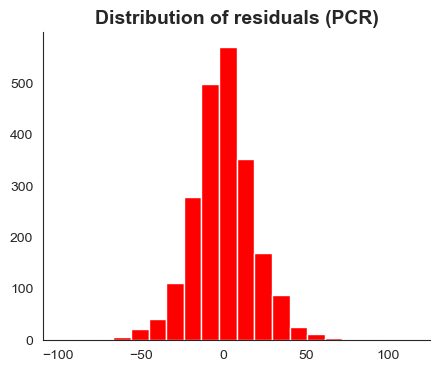

In [29]:
residuals_pcr = PCRmodel.resid

sns.set_style("white")
    
plt.figure(figsize=(5,4))
    
plt.hist(residuals_pcr, bins = 20, color = 'red')
    
plt.title(label = "Distribution of esiduals (PCR)" , fontsize = 14, weight = 'bold')
    
sns.despine()
    
plt.show()

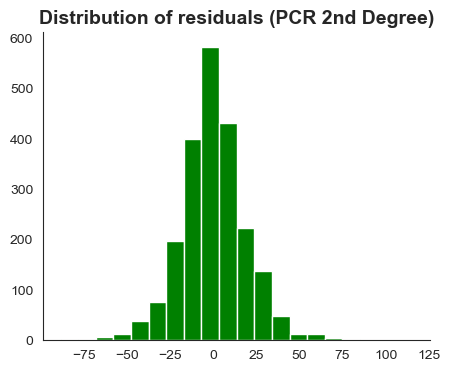

In [30]:
residuals_pcr2 = PCR_2model.resid

sns.set_style("white")
    
plt.figure(figsize=(5,4))
    
plt.hist(residuals_pcr2, bins = 20, color = 'green')
    
plt.title(label = "Distribution of residuals (PCR 2nd Degree)" , fontsize = 14, weight = 'bold')
    
sns.despine()
    
plt.show()

Both models display normally distributed residuals. However, the variance of the second model is higher, leading to a deterioration in performance.

__Saving the Results__

In [31]:
Linear_Regression_Models_Part1_Results.to_csv(r'Linear_Regression_Models_Part1_Results.csv', index=True, 
                                              index_label= 'Metrics')